<a href="https://colab.research.google.com/github/GIT-gmp/Task-5--AI-ML/blob/main/Copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Decision Tree Classifier ---
Decision Tree Accuracy: 0.9708
Decision Tree visualized as 'heart_decision_tree.png'

--- Analyzing Overfitting and Controlling Tree Depth ---


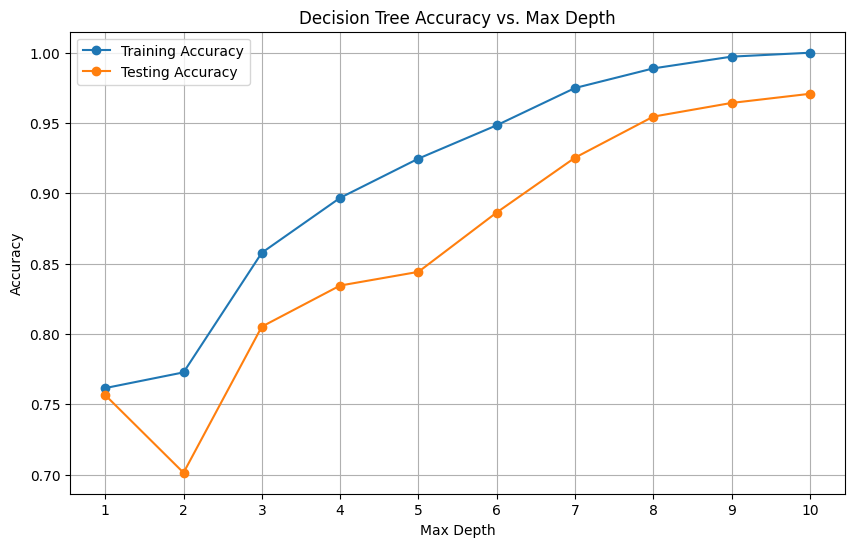

Plot showing training and testing accuracy vs. max_depth displayed.
Observe how training accuracy generally increases with depth, while testing accuracy might peak and then decrease (overfitting).

--- Random Forest Classifier ---
Random Forest Accuracy: 0.9805
Comparison: Decision Tree Accuracy = 0.9708, Random Forest Accuracy = 0.9805

--- Feature Importances (Random Forest) ---
cp          0.132274
thalach     0.125039
ca          0.122912
oldpeak     0.122852
thal        0.113005
age         0.085554
chol        0.079872
trestbps    0.068356
slope       0.051335
exang       0.042210
sex         0.028721
restecg     0.018155
fbs         0.009714
dtype: float64


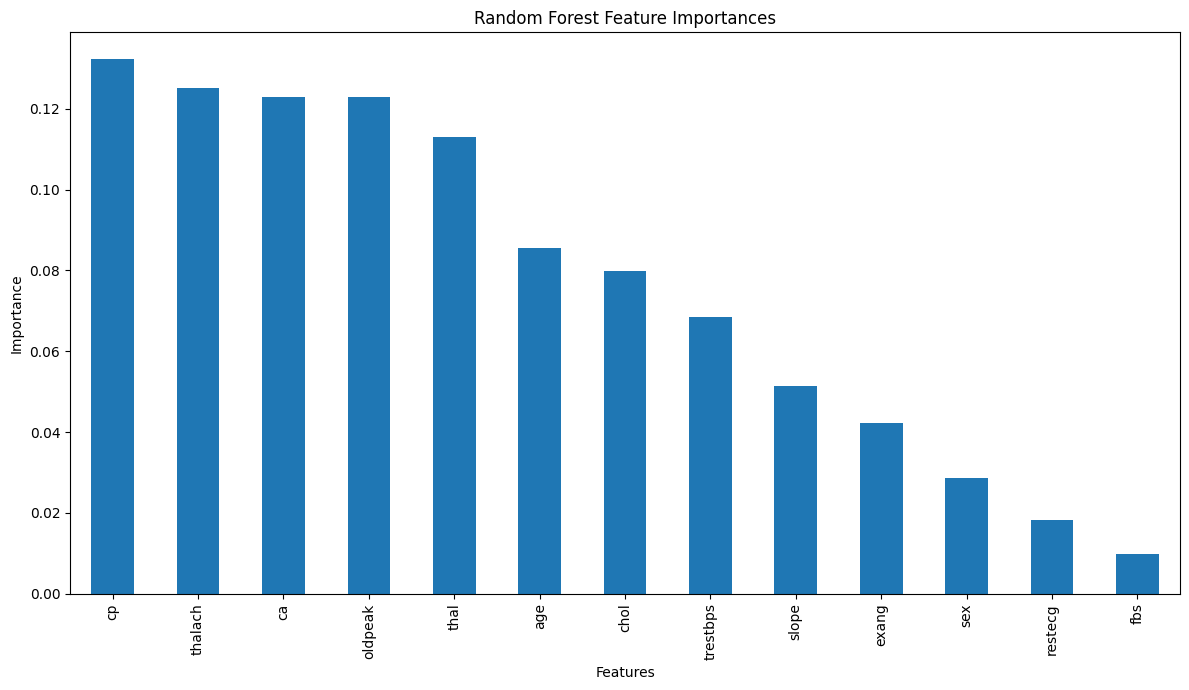

Bar plot of feature importances displayed.

--- Cross-Validation Evaluation ---
Decision Tree Cross-Validation Scores: [1. 1. 1. 1. 1.]
Decision Tree Mean CV Accuracy: 1.0000
Decision Tree Std Dev CV Accuracy: 0.0000
Random Forest Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Random Forest Mean CV Accuracy: 0.9971
Random Forest Std Dev CV Accuracy: 0.0059

Cross-validation provides a more robust estimate of model performance.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import graphviz
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/heart.csv' # Corrected file path
df = pd.read_csv(file_path)

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 1. Train a Decision Tree Classifier and visualize the tree. ---
print("--- Decision Tree Classifier ---")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")


dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=X.columns,
                           class_names=[str(c) for c in y.unique()],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
# graph.render("heart_decision_tree", view=True, format='png') # Disabling view=True as it might not work directly in Colab
graph.render("heart_decision_tree", format='png')
print("Decision Tree visualized as 'heart_decision_tree.png'")


# --- 2. Analyze overfitting and control tree depth. ---
print("\n--- Analyzing Overfitting and Controlling Tree Depth ---")
train_accuracies = []
test_accuracies = []
depths = range(1, 11)

for depth in depths:
    dt_controlled = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_controlled.fit(X_train, y_train)

    y_train_pred = dt_controlled.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))

    y_test_pred = dt_controlled.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()
print("Plot showing training and testing accuracy vs. max_depth displayed.")
print("Observe how training accuracy generally increases with depth, while testing accuracy might peak and then decrease (overfitting).")

# --- 3. Train a Random Forest and compare accuracy. ---
print("\n--- Random Forest Classifier ---")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Comparison: Decision Tree Accuracy = {accuracy_dt:.4f}, Random Forest Accuracy = {accuracy_rf:.4f}")

# --- 4. Interpret feature importances. ---
print("\n--- Feature Importances (Random Forest) ---")
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
print(feature_importances_sorted)

plt.figure(figsize=(12, 7))
feature_importances_sorted.plot(kind='bar')
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
print("Bar plot of feature importances displayed.")

# --- 5. Evaluate using cross-validation ---
print("\n--- Cross-Validation Evaluation ---")

# Decision Tree Cross-Validation
dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=5) # 5-fold cross-validation
print(f"Decision Tree Cross-Validation Scores: {dt_cv_scores}")
print(f"Decision Tree Mean CV Accuracy: {np.mean(dt_cv_scores):.4f}")
print(f"Decision Tree Std Dev CV Accuracy: {np.std(dt_cv_scores):.4f}")

# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5) # 5-fold cross-validation
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Mean CV Accuracy: {np.mean(rf_cv_scores):.4f}")
print(f"Random Forest Std Dev CV Accuracy: {np.std(rf_cv_scores):.4f}")

print("\nCross-validation provides a more robust estimate of model performance.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
